# 1. Linear Regression Basic


## 1.1 Prepare the data


First, import some library. In thisbook, i use linear regression model for machine learning.

In [22]:
# For data organizing
import numpy as np
import pandas as pd

# For data pretty 
import seaborn as sns
import matplotlib.pyplot as plt

# For machine learning
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Then we start to make or import big data to make machine learning model.

In [3]:
# in this time, i use csv file that has header inside it. 
# If you want to use dictionary, use 'pd.DataFrame(your_dictionary)' syntax. it is because the data you make before is not a data frame, unlike csv file
db = pd.read_csv(r"D:\Pendidikan\Pelatihan\Samsung_Inovation_Campus_Batch_5\Stage 3 - AI bootcamp\Code\MachineLearning\data_galton.csv")
db.head()

,child,parent
0,61.7,70.5
1,61.7,68.5
2,61.7,65.5
3,61.7,64.5
4,61.7,64.0


In that csv file, there's many data that came with duplicate. So, we can summarize the table to show the frecuency of each data and even, we can make some prettier display of the data using graphic.

In [4]:
# Summarize to show frecuency of each data
sumData_db = pd.crosstab(db.parent, db.child)
sumData_db

child,61.7,62.2,63.2,64.2,65.2,66.2,67.2,68.2,69.2,70.2,71.2,72.2,73.2,73.7
parent,,,,,,,,,,,,,,
64.0,1,0,2,4,1,2,2,1,1,0,0,0,0,0
64.5,1,1,4,4,1,5,5,0,2,0,0,0,0,0
65.5,1,0,9,5,7,11,11,7,7,5,2,1,0,0
66.5,0,3,3,5,2,17,17,14,13,4,0,0,0,0
67.5,0,3,5,14,15,36,38,28,38,19,11,4,0,0
68.5,1,0,7,11,16,25,31,34,48,21,18,4,3,0
69.5,0,0,1,16,4,17,27,20,33,25,20,11,4,5
70.5,1,0,1,0,1,1,3,12,18,14,7,4,3,3
71.5,0,0,0,0,1,3,4,3,5,10,4,9,2,2


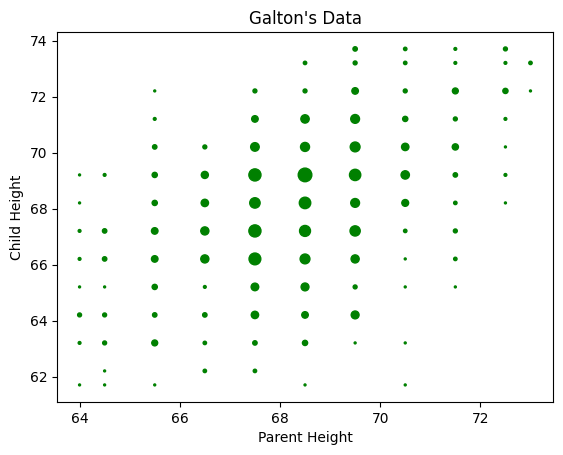

In [5]:

# transform the summarized data so it could be diplayed as a scatter plot
nrows = sumData_db.shape[0]
ncols = sumData_db.shape[1]
childHeights = list(sumData_db.columns)
parentHeights = list(sumData_db.index)

combo = [ (x,y,sumData_db.loc[x,y]) for x in parentHeights for y in childHeights]
combo = pd.DataFrame(combo, columns = ['x','y','freq'])

# Make a graph 
plt.scatter(combo.x, combo.y, s=combo.freq*2, c= 'green', alpha= 1)
plt.xlabel('Parent Height')
plt.ylabel('Child Height')
plt.title("Galton's Data")
plt.show()

## 1.2 Start training model

Now, we can start training using Linear Regression.<br>
To make a training model, there should be one feature and one target. Feature is something that we have known and target is something that will we predict the value.<br>

For example, we want to predict house price with 200m^2 wide. Price value is target and house wide is feature.

In [31]:
# Initiate linear regression object
lr = LinearRegression(fit_intercept= True)
feature = db[['parent']]
target = db[['child']]
lr.fit(feature, target)

LinearRegression()

The syntax below is to show  intercept and slope of the equation.<br>
When we have equation like y = ax + b, with y is result we need, then a = slope; b = intercept.


In [15]:
# show slope
print("Slope ", lr.coef_[0][0])
# show intercept
print("Intercept", lr.intercept_[0])
print(f"Equation = {lr.coef_[0][0]}x + {lr.intercept_[0]}")

Slope  0.6462905819936409
Intercept 23.941530180412848
Equation = 0.6462905819936409x + 23.941530180412848


The model precision and accuracy can be represented as root square (R^2) and root mean square (R). 

In [32]:
r2 =  lr.score(feature, target)
mse = mean_squared_error(target, lr.predict(feature))
print("R2 ", r2)
print("MSE ", mse)

R2  0.2104629105616389
MSE  5.000293765551662


From the output we see above, R2 value is closer to 0 than 1, it means that the prediction based on the current feature (in this case, parent's heights) can explain only +-20% of the variance, indicating that other factor may be influencing the prediction.<br>
In other side, the closer mse value to 0, the better accuracy of model has.

And now, we will make a prediction line using linear regression. The prediction is come from modeling.

In [8]:
# Start predicting parent value. In other word, make a linear line that represent of parent's value.
predY = lr.predict(db[['parent']])      

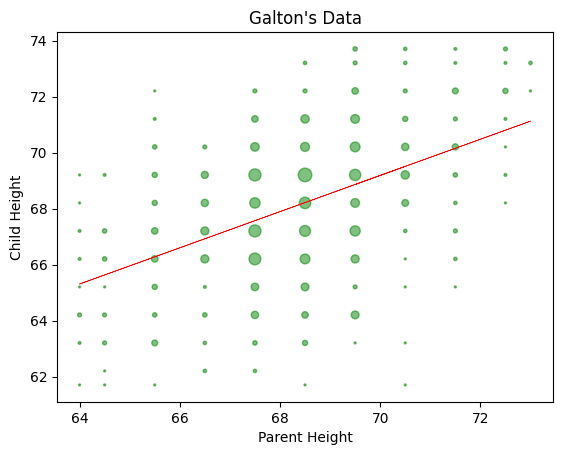

In [9]:
# Make a graph with prediction line of parent's value
plt.plot(db.parent.values, predY, c = 'red', linestyle='-', linewidth=0.5)
plt.scatter(combo.x, combo.y, s=combo.freq*2, c= 'green', alpha= 0.5)
plt.xlabel('Parent Height')
plt.ylabel('Child Height')
plt.title("Galton's Data")
plt.show()

In this time, we had sucsessfully make a model. Parent height is feature and child height is target.<br>
So if we want to predict child height using parent value, we can type this syntax. 

In [33]:
# predict child height using parent height 
parentheight = 68.5       # input feature
predicted_height = lr.predict([[parentheight]])
print(f"Prdicted child height = {predicted_height[0]}")

Prdicted child height = [68.21243505]


c:\Users\hilma\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


# 2. Linear Regression with Dummy Variable

## 2.1 What is dummy variable?

Dummy variable can be repsesented as additional factor that will influence feature value. This process often used on data that has some categorical value, for instance, gender that known has value of male or female. <br>


If we want to predict height value using weight value of some person, the predicition will different for each gender. Assume that female has lighter weight than male. When we use all of weight data that contain both of male and female weight values to train the model, the prediction will be more irrelevant than when we separate the values. But, if we separate the model, time taken of training the model can be longer than usual. In this case, we can use dummy variable to minimize time the training taken. <br>


The dummy variable works by add an additional value IF a condition is present. For example, the equation of the model is $Y = a + bX + cZ$, with X is feature of model and Z is dummy variable. If we set a condition so the value of Z = 1 IF the condition is met, then the equation will be same as before. BUT, if the condition is void, then Z = 0, and the equation will be different.

$Y_{male} = a + bX + cX$ <br>
$Y_{female} = a + bX$

In this case, the predicition will become more reliable. So, let's go for practice!